In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.integrate import odeint

In [8]:
def heaviside_analytical(t, tau):
    return 1 / (1 + np.exp(-20 * (t - tau)))

#### <p align="center">SIR differential equations</p>

$$\frac{\partial S}{\partial t}=-\beta SI$$
$$\frac{\partial I}{\partial t}=\beta SI - \gamma I$$
$$\frac{\partial R}{\partial t}=\gamma I$$

In [9]:
def SIR(y, t, beta, gamma):
    """
    Function modeling a SIR model.

    Args:
        t: time
        y: vector of the variables

    Returns:
        dydt: vector of the derivatives of the variables
    """
    S, I, R = y
    N = S + I + R
    dydt = [-beta * S * I / N, beta * S * I / N - gamma * I, gamma * I]
    return dydt

#### <p align="center">SIR differential equations with vaccinations</p>

$$\frac{\partial S}{\partial t}=-\beta SI - ve\text{Hev}(t, t_1)\cdot(1-\text{Hev}(t, t_2))$$
$$\frac{\partial I}{\partial t}=\beta SI - \gamma I$$
$$\frac{\partial R}{\partial t}=\gamma I + ve\text{Hev}(t, t_1)\cdot(1-\text{Hev}(t, t_2))$$

In [10]:
def SIR_with_vaccination(y, t, beta, gamma, vac_rate, eff, t_1, t_2):
    S, I, R = y
    N = S + I + R
    hev = heaviside_analytical
    if vac_rate*eff*(t_2-t_1)>S:
        t_2 = t_1 + S/vac_rate/eff
    dydt = [
        -beta * S * I / N - vac_rate * eff * hev(t, t_1) * (1 - hev(t, t_2)),
        beta * S * I / N - gamma * I,
        gamma * I + vac_rate * eff * hev(t, t_1) * (1 - hev(t, t_2)),
    ]
    return dydt

In [11]:
def plot_SIR_with_vaccination(y, y_v, t, beta, gamma):
    plt.gcf()
    plt.style.use("fivethirtyeight")
    plt.rcParams.update({"font.size": 12})
    np.set_printoptions(suppress=True)
    S, I, R = y[:, 0], y[:, 1], y[:, 2]
    S_v, I_v, R_v = y_v[:, 0], y_v[:, 1], y_v[:, 2]
    figure = plt.figure()
    dpi = figure.get_dpi()
    figure.set_figwidth(768 / dpi)
    figure.set_figheight(576 / dpi)
    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I, label="Infectious")
    plt.plot(t, R, label="Recovered")
    plt.plot(t, S_v, "--", color="blue", label="Susceptible (vaccinated)")
    plt.plot(t, I_v, "--", color="orange", label="Infectious (vaccinated)")
    plt.plot(t, R_v, "--", color="yellow", label="Recovered (vaccinated)")
    gamma_text = (
        "$γ = \\frac{1}{\\mathtt{recovery\\;time}} = "
        + str(round(gamma, 3))
        + "$"
    )
    r_0_text = "$R_0 = \\frac{β}{γ}=" + str(round(beta / gamma, 3)) + "$"
    plt.ticklabel_format(axis="y", useOffset=False, style="Plain")
    plt.xlabel("Time [days]")
    plt.ylabel("Number of people")
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(mpatches.Patch(color="none", label=gamma_text))
    handles.append(mpatches.Patch(color="none", label=r_0_text))
    plt.legend(handles=handles)
    plt.tight_layout()
    return figure

C:\Users\work\AppData\Local\Temp/ipykernel_6072/3840080379.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-20 * (t - tau)))


<Figure size 432x288 with 0 Axes>

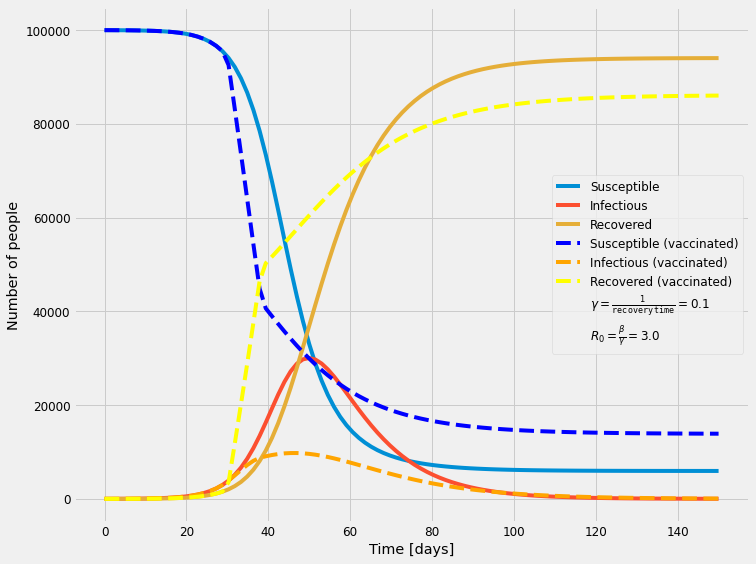

In [12]:
beta = 0.3
gamma = 0.1

S0 = 100000
I0 = 10
R0 = 0
y0 = [S0, I0, R0]

t_1 = 150
t_values = np.linspace(0, t_1, 100)

vac_rate = 5000
eff = 1
t_beg = 30
t_end = 70


# Solve the ODEs
y_values = odeint(SIR, y0, t_values, args=(beta, gamma))
y_v_values = odeint(SIR_with_vaccination, y0, t_values, args=(beta, gamma, vac_rate, eff, t_beg, t_end))

# Plot the solution
fig = plot_SIR_with_vaccination(y_values, y_v_values, t_values, beta, gamma)